## Preprocessing Data Steps:
1. Merging "Cursive Writing in a Dotted Line Emotion Label" and "Bold the Sentence Task Emotion Label" data on 'Student ID' and named the merged file as **"Merged_Cursive_Bold_Data.csv"**.
2. Merging Fine Motor Skill Label data with Merged_Cursive_Bold_Data.csv on 'Student ID', 'Fine Motor Skill Label' and named the merged data frame as **df_final_merged**.
3. 

In [178]:
%pip install pandas scikit-learn openpyx

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement openpyx (from versions: none)
ERROR: No matching distribution found for openpyx

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [180]:
# File paths
file_path_cursive = r'Resources/Cursive Writing in a Dotted Line Emotion Label.xlsx'
file_path_fine_motor = r'Resources/Fine Motor Skill Label.xlsx'
file_path_bold = r'Resources/Bold the Sentence Task Emotion Label.xlsx'

# Load the Excel data
df_cursive = pd.read_excel(file_path_cursive)
df_fine_motor = pd.read_excel(file_path_fine_motor)
df_bold = pd.read_excel(file_path_bold)

In [181]:
df_fine_motor.head(5)

,NO,Student ID,Ages (Years),Gender,Grade,Bold The Sentence,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Cursive Writing in a Dotted Line,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fine Motor Skill Label
0,NaN,NaN,NaN,NaN,NaN,Speed (Detik),Number Stroke,Mean Pressure,Mean Altitude,Modulus Altitude,Mean Azimuth,Modulus Azimuth,Speed,Number Stroke,Mean Pressure,Mean Altitude,Modulus Altitude,Mean Azimuth,Modulus Azimuth,NaN
1,1.0,10001.0,7.083333,Boys,1.0,87,28,474,1467,1520,579,600,165,28,474,1467,1520,579,600,Good
2,2.0,10002.0,6.750000,Boys,1.0,106,36,224,1098,1090,446,440,82,25,285,936,900,470,460,Average
3,3.0,10003.0,6.416667,Boys,1.0,116,50,318,1235,1240,501,480,155,44,302,1160,1220,468,460,Less
4,4.0,10004.0,6.166667,Boys,1.0,100,55,295,1073,1070,565,550,128,89,240,1102,1080,559,550,Good


### Merging "Cursive Writing in a Dotted Line Emotion Label" and "Bold the Sentence Task Emotion Label" data on 'Student ID'

### Preprocess "Cursive Writing in a Dotted Line Emotion Label" file

In [182]:
# Inspect the first few rows of the Cursive Writing in a Dotted Line Emotion Label
print(df_cursive.head(5))

    NO  Student ID  Ages (Years) Gender  Grade  \
0  NaN         NaN           NaN    NaN    NaN   
1  1.0     10001.0      7.083333   Boys    1.0   
2  2.0     10002.0      6.750000   Boys    1.0   
3  3.0     10003.0      6.416667   Boys    1.0   
4  4.0     10004.0      6.166667   Boys    1.0   

  Cursive Writing in a Dotted Line     Unnamed: 6     Unnamed: 7  \
0                            Speed  Number Stroke  Mean Pressure   
1                              165             28            474   
2                               82             25            285   
3                              155             44            302   
4                              128             89            240   

      Unnamed: 8        Unnamed: 9   Unnamed: 10      Unnamed: 11  \
0  Mean Altitude  Modulus Altitude  Mean Azimuth  Modulus Azimuth   
1           1467              1520           579              600   
2            936               900           470              460   
3           11

In [183]:
# Rename the columns
df_cursive.rename(columns={
    'Cursive Writing in a Dotted Line': 'Speed_C',
    'Unnamed: 6': 'Number Stroke_C',
    'Unnamed: 7': 'Mean Pressure_C',
    'Unnamed: 8': 'Mean Altitude_C',
    'Unnamed: 9': 'Modulus Altitude_C',
    'Unnamed: 10': 'Mean Azimuth_C',
    'Unnamed: 11': 'Modulus Azimuth_C'
}, inplace=True)

# Display the updated columns
print(df_cursive.columns)


Index(['NO', 'Student ID', 'Ages (Years)', 'Gender', 'Grade', 'Speed_C',
       'Number Stroke_C', 'Mean Pressure_C', 'Mean Altitude_C',
       'Modulus Altitude_C', 'Mean Azimuth_C', 'Modulus Azimuth_C',
       'Label Emotion'],
      dtype='object')


#### Preprocess "Bold the Sentence Task Emotion Label" file

In [184]:
# Inspect the first few rows of the Bold the Sentence Task Emotion Label file
print(df_bold.head(5))

    NO  Student ID  Ages (Years) Gender  Grade Bold The Sentence   \
0  NaN         NaN           NaN    NaN    NaN      Speed (Detik)   
1  1.0     10001.0      7.083333   Boys    1.0                 87   
2  2.0     10002.0      6.750000   Boys    1.0                106   
3  3.0     10003.0      6.416667   Boys    1.0                116   
4  4.0     10004.0      6.166667   Boys    1.0                100   

      Unnamed: 6     Unnamed: 7     Unnamed: 8        Unnamed: 9  \
0  Number Stroke  Mean Pressure  Mean Altitude  Modulus Altitude   
1             28            474           1467              1520   
2             36            224           1098              1090   
3             50            318           1235              1240   
4             55            295           1073              1070   

    Unnamed: 10      Unnamed: 11 Label Emotion  
0  Mean Azimuth  Modulus Azimuth           NaN  
1           579              600       positif  
2           446              

In [185]:
# Rename the columns
df_bold.rename(columns={
    'Bold The Sentence ': 'Speed_B',
    'Unnamed: 6': 'Number Stroke_B',
    'Unnamed: 7': 'Mean Pressure_B',
    'Unnamed: 8': 'Mean Altitude_B',
    'Unnamed: 9': 'Modulus Altitude_B',
    'Unnamed: 10': 'Mean Azimuth_B',
    'Unnamed: 11': 'Modulus Azimuth_B'
}, inplace=True)

# Display the updated columns
print(df_bold.columns)


Index(['NO', 'Student ID', 'Ages (Years)', 'Gender', 'Grade', 'Speed_B',
       'Number Stroke_B', 'Mean Pressure_B', 'Mean Altitude_B',
       'Modulus Altitude_B', 'Mean Azimuth_B', 'Modulus Azimuth_B',
       'Label Emotion'],
      dtype='object')


#### Merging the Cursive Writing in a Dotted Line Emotion Label" and "Bold the Sentence Task Emotion Label

In [186]:
# Join the two DataFrames on Student ID
df_merged = pd.merge(df_cursive, df_bold, on='Student ID', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
print(df_merged.head())

Merged DataFrame:
   NO_x  Student ID  Ages (Years)_x Gender_x  Grade_x Speed_C Number Stroke_C  \
0   NaN         NaN             NaN      NaN      NaN   Speed   Number Stroke   
1   1.0     10001.0        7.083333     Boys      1.0     165              28   
2   2.0     10002.0        6.750000     Boys      1.0      82              25   
3   3.0     10003.0        6.416667     Boys      1.0     155              44   
4   4.0     10004.0        6.166667     Boys      1.0     128              89   

  Mean Pressure_C Mean Altitude_C Modulus Altitude_C  ... Gender_y Grade_y  \
0   Mean Pressure   Mean Altitude   Modulus Altitude  ...      NaN     NaN   
1             474            1467               1520  ...     Boys     1.0   
2             285             936                900  ...     Boys     1.0   
3             302            1160               1220  ...     Boys     1.0   
4             240            1102               1080  ...     Boys     1.0   

         Speed_B  Number S

In [187]:
# Save the merged DataFrame as a CSV file
df_merged.to_csv('Merged_Cursive_Bold_Data.csv', index=False)


#### Merging Fine Motor Skill Label data with Merged_Cursive_Bold_Data.csv

In [188]:
# Load the merged cursive and bold data from the CSV file
df_merged = pd.read_csv('Merged_Cursive_Bold_Data.csv')

In [189]:
# Merge df_merged (cursive + bold) with df_fine_motor on 'Student ID'
df_final_merged = pd.merge(df_merged, df_fine_motor[['Student ID', 'Fine Motor Skill Label']], on='Student ID', how='inner')

# Display the first few rows of the final merged DataFrame
print("Final Merged DataFrame:")
print(df_final_merged.head(5))


Final Merged DataFrame:
   NO_x  Student ID  Ages (Years)_x Gender_x  Grade_x Speed_C Number Stroke_C  \
0   NaN         NaN             NaN      NaN      NaN   Speed   Number Stroke   
1   1.0     10001.0        7.083333     Boys      1.0     165              28   
2   2.0     10002.0        6.750000     Boys      1.0      82              25   
3   3.0     10003.0        6.416667     Boys      1.0     155              44   
4   4.0     10004.0        6.166667     Boys      1.0     128              89   

  Mean Pressure_C Mean Altitude_C Modulus Altitude_C  ... Grade_y  \
0   Mean Pressure   Mean Altitude   Modulus Altitude  ...     NaN   
1             474            1467               1520  ...     1.0   
2             285             936                900  ...     1.0   
3             302            1160               1220  ...     1.0   
4             240            1102               1080  ...     1.0   

         Speed_B Number Stroke_B  Mean Pressure_B  Mean Altitude_B  \
0  S

#### Preprocess df_final_merged:
a. Drop column with index 0.
b. Drop rows with missing values.
c. Drop columns with duplicate values.
d. Encode gender_x column.

In [190]:
# Drop the row with index 0
df_final_merged = df_final_merged.drop(0)

# Reset the index if needed
df_final_merged.reset_index(drop=True, inplace=True)

# Display the updated DataFrame to verify
print(df_final_merged.head(5))


   NO_x  Student ID  Ages (Years)_x Gender_x  Grade_x Speed_C Number Stroke_C  \
0   1.0     10001.0        7.083333     Boys      1.0     165              28   
1   2.0     10002.0        6.750000     Boys      1.0      82              25   
2   3.0     10003.0        6.416667     Boys      1.0     155              44   
3   4.0     10004.0        6.166667     Boys      1.0     128              89   
4   5.0     10005.0        6.916667     Boys      1.0     168              40   

  Mean Pressure_C Mean Altitude_C Modulus Altitude_C  ... Grade_y Speed_B  \
0             474            1467               1520  ...     1.0      87   
1             285             936                900  ...     1.0     106   
2             302            1160               1220  ...     1.0     116   
3             240            1102               1080  ...     1.0     100   
4             362            1133               1170  ...     1.0     247   

  Number Stroke_B  Mean Pressure_B  Mean Altitude_

In [191]:
# Check for missing values in the final merged file 
print(df_final_merged.isnull().sum())

NO_x                      0
Student ID                0
Ages (Years)_x            0
Gender_x                  0
Grade_x                   0
Speed_C                   0
Number Stroke_C           0
Mean Pressure_C           0
Mean Altitude_C           0
Modulus Altitude_C        0
Mean Azimuth_C            0
Modulus Azimuth_C         0
Label Emotion_x           4
NO_y                      0
Ages (Years)_y            0
Gender_y                  0
Grade_y                   0
Speed_B                   0
Number Stroke_B           0
Mean Pressure_B           0
Mean Altitude_B           0
Modulus Altitude_B        0
Mean Azimuth_B            0
Modulus Azimuth_B         0
Label Emotion_y           4
Fine Motor Skill Label    0
dtype: int64


In [192]:
# Drop rows with missing values.
df_cleaned = df_final_merged.dropna()
df_cleaned.head(5)

,NO_x,Student ID,Ages (Years)_x,Gender_x,Grade_x,Speed_C,Number Stroke_C,Mean Pressure_C,Mean Altitude_C,Modulus Altitude_C,...,Grade_y,Speed_B,Number Stroke_B,Mean Pressure_B,Mean Altitude_B,Modulus Altitude_B,Mean Azimuth_B,Modulus Azimuth_B,Label Emotion_y,Fine Motor Skill Label
0,1.0,10001.0,7.083333,Boys,1.0,165,28,474,1467,1520,...,1.0,87,28,474,1467,1520,579,600,positif,Good
2,3.0,10003.0,6.416667,Boys,1.0,155,44,302,1160,1220,...,1.0,116,50,318,1235,1240,501,480,negatif,Less
3,4.0,10004.0,6.166667,Boys,1.0,128,89,240,1102,1080,...,1.0,100,55,295,1073,1070,565,550,positif,Good
4,5.0,10005.0,6.916667,Boys,1.0,168,40,362,1133,1170,...,1.0,247,44,441,1059,1010,519,520,negatif,Less
5,6.0,10006.0,6.500000,Boys,1.0,124,81,274,850,900,...,1.0,76,62,318,857,900,692,710,positif,Less


In [193]:
# Check for missing values in the final merged file 
print(df_cleaned.isnull().sum())

NO_x                      0
Student ID                0
Ages (Years)_x            0
Gender_x                  0
Grade_x                   0
Speed_C                   0
Number Stroke_C           0
Mean Pressure_C           0
Mean Altitude_C           0
Modulus Altitude_C        0
Mean Azimuth_C            0
Modulus Azimuth_C         0
Label Emotion_x           0
NO_y                      0
Ages (Years)_y            0
Gender_y                  0
Grade_y                   0
Speed_B                   0
Number Stroke_B           0
Mean Pressure_B           0
Mean Altitude_B           0
Modulus Altitude_B        0
Mean Azimuth_B            0
Modulus Azimuth_B         0
Label Emotion_y           0
Fine Motor Skill Label    0
dtype: int64


In [194]:
# Drop columns NO_x, NO_y, 'Ages (Years)_y' and 'Grade_y'as NO_x, NO_y are index columns and 'Ages (Years)_y','Grade_y' are duplicates.
df_cleaned.drop(columns=['NO_x', 'NO_y','Ages (Years)_y','Grade_y'], inplace=True)

# Display the first few rows of the DataFrame to confirm the changes
print(df_cleaned.head())


   Student ID  Ages (Years)_x Gender_x  Grade_x Speed_C Number Stroke_C  \
0     10001.0        7.083333     Boys      1.0     165              28   
2     10003.0        6.416667     Boys      1.0     155              44   
3     10004.0        6.166667     Boys      1.0     128              89   
4     10005.0        6.916667     Boys      1.0     168              40   
5     10006.0        6.500000     Boys      1.0     124              81   

  Mean Pressure_C Mean Altitude_C Modulus Altitude_C Mean Azimuth_C  ...  \
0             474            1467               1520            579  ...   
2             302            1160               1220            468  ...   
3             240            1102               1080            559  ...   
4             362            1133               1170            545  ...   
5             274             850                900            741  ...   

  Gender_y Speed_B Number Stroke_B Mean Pressure_B Mean Altitude_B  \
0     Boys      87    

C:\Users\Ernie\AppData\Local\Temp\ipykernel_28604\1715629289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['NO_x', 'NO_y','Ages (Years)_y','Grade_y'], inplace=True)


In [195]:
# Create a copy of the DataFrame 
df_cleaned = df_cleaned.copy()

# Check if Label Emotion_x and Label Emotion_y are duplicates (identical across all rows)
duplicates_check = (df_cleaned['Label Emotion_x'] == df_cleaned['Label Emotion_y']).all()

# Output the result and drop 'Label Emotion_x' if they are identical
if duplicates_check:
    print("Label Emotion_x and Label Emotion_y are identical across all rows.")
    # Drop 'Label Emotion_x' as it is redundant
    df_cleaned.drop(columns=['Label Emotion_x'], inplace=True)
else:
    print("Label Emotion_x and Label Emotion_y have differences.")

# Display the first few rows of the DataFrame to confirm
print(df_cleaned.head())


Label Emotion_x and Label Emotion_y are identical across all rows.
   Student ID  Ages (Years)_x Gender_x  Grade_x Speed_C Number Stroke_C  \
0     10001.0        7.083333     Boys      1.0     165              28   
2     10003.0        6.416667     Boys      1.0     155              44   
3     10004.0        6.166667     Boys      1.0     128              89   
4     10005.0        6.916667     Boys      1.0     168              40   
5     10006.0        6.500000     Boys      1.0     124              81   

  Mean Pressure_C Mean Altitude_C Modulus Altitude_C Mean Azimuth_C  ...  \
0             474            1467               1520            579  ...   
2             302            1160               1220            468  ...   
3             240            1102               1080            559  ...   
4             362            1133               1170            545  ...   
5             274             850                900            741  ...   

  Gender_y Speed_B Number

In [196]:
# Step 1: Check if Gender_x and Gender_y are duplicates (identical across all rows)
duplicates_check_gender = (df_cleaned['Gender_x'] == df_cleaned['Gender_y']).all()

# Step 2: Output the result and drop 'Gender_x' if they are identical
if duplicates_check_gender:
    print("Gender_x and Gender_y are identical across all rows.")
    # Drop 'Gender_y' as it is redundant
    df_cleaned.drop(columns=['Gender_y'], inplace=True)
else:
    print("Gender_x and Gender_y have differences.")

# Step 3: Display the first few rows of the DataFrame to confirm
print(df_cleaned.head())


Gender_x and Gender_y are identical across all rows.
   Student ID  Ages (Years)_x Gender_x  Grade_x Speed_C Number Stroke_C  \
0     10001.0        7.083333     Boys      1.0     165              28   
2     10003.0        6.416667     Boys      1.0     155              44   
3     10004.0        6.166667     Boys      1.0     128              89   
4     10005.0        6.916667     Boys      1.0     168              40   
5     10006.0        6.500000     Boys      1.0     124              81   

  Mean Pressure_C Mean Altitude_C Modulus Altitude_C Mean Azimuth_C  \
0             474            1467               1520            579   
2             302            1160               1220            468   
3             240            1102               1080            559   
4             362            1133               1170            545   
5             274             850                900            741   

  Modulus Azimuth_C Speed_B Number Stroke_B Mean Pressure_B Mean Alti

In [197]:
# Encode 'Gender_x' column (Boys: 0, Girls: 1)
df_cleaned['Gender_x'] = df_cleaned['Gender_x'].map({'Boys': 0, 'Girls': 1})

# Check the DataFrame after encoding
print(df_cleaned.head())

   Student ID  Ages (Years)_x  Gender_x  Grade_x Speed_C Number Stroke_C  \
0     10001.0        7.083333         0      1.0     165              28   
2     10003.0        6.416667         0      1.0     155              44   
3     10004.0        6.166667         0      1.0     128              89   
4     10005.0        6.916667         0      1.0     168              40   
5     10006.0        6.500000         0      1.0     124              81   

  Mean Pressure_C Mean Altitude_C Modulus Altitude_C Mean Azimuth_C  \
0             474            1467               1520            579   
2             302            1160               1220            468   
3             240            1102               1080            559   
4             362            1133               1170            545   
5             274             850                900            741   

  Modulus Azimuth_C Speed_B Number Stroke_B Mean Pressure_B Mean Altitude_B  \
0               600      87          

### Preprocessing Data further for ML Model

### Duplicate negative 'Label Emotion_y' rows to balance the data

In [198]:
# Duplicate rows where Label Emotion_y is 'negative' to balance the data
negative_class = df_cleaned[df_cleaned['Label Emotion_y'] == 'negatif']
df_balanced = pd.concat([df_cleaned, negative_class])  # Combine the original data with duplicated rows


In [199]:
df_balanced.head(5)

,Student ID,Ages (Years)_x,Gender_x,Grade_x,Speed_C,Number Stroke_C,Mean Pressure_C,Mean Altitude_C,Modulus Altitude_C,Mean Azimuth_C,Modulus Azimuth_C,Speed_B,Number Stroke_B,Mean Pressure_B,Mean Altitude_B,Modulus Altitude_B,Mean Azimuth_B,Modulus Azimuth_B,Label Emotion_y,Fine Motor Skill Label
0,10001.0,7.083333,0,1.0,165,28,474,1467,1520,579,600,87,28,474,1467,1520,579,600,positif,Good
2,10003.0,6.416667,0,1.0,155,44,302,1160,1220,468,460,116,50,318,1235,1240,501,480,negatif,Less
3,10004.0,6.166667,0,1.0,128,89,240,1102,1080,559,550,100,55,295,1073,1070,565,550,positif,Good
4,10005.0,6.916667,0,1.0,168,40,362,1133,1170,545,530,247,44,441,1059,1010,519,520,negatif,Less
5,10006.0,6.500000,0,1.0,124,81,274,850,900,741,780,76,62,318,857,900,692,710,positif,Less


In [200]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 92
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              120 non-null    float64
 1   Ages (Years)_x          120 non-null    float64
 2   Gender_x                120 non-null    int64  
 3   Grade_x                 120 non-null    float64
 4   Speed_C                 120 non-null    object 
 5   Number Stroke_C         120 non-null    object 
 6   Mean Pressure_C         120 non-null    object 
 7   Mean Altitude_C         120 non-null    object 
 8   Modulus Altitude_C      120 non-null    object 
 9   Mean Azimuth_C          120 non-null    object 
 10  Modulus Azimuth_C       120 non-null    object 
 11  Speed_B                 120 non-null    object 
 12  Number Stroke_B         120 non-null    object 
 13  Mean Pressure_B         120 non-null    object 
 14  Mean Altitude_B         120 non-null    object 


In [201]:
# Rename the values in 'Label Emotion_y' column
df_balanced['Label Emotion_y'] = df_balanced['Label Emotion_y'].replace({'positif': 'positive', 'negatif': 'negative'})

# Display the updated DataFrame to verify the changes
print(df_balanced.head(5))


   Student ID  Ages (Years)_x  Gender_x  Grade_x Speed_C Number Stroke_C  \
0     10001.0        7.083333         0      1.0     165              28   
2     10003.0        6.416667         0      1.0     155              44   
3     10004.0        6.166667         0      1.0     128              89   
4     10005.0        6.916667         0      1.0     168              40   
5     10006.0        6.500000         0      1.0     124              81   

  Mean Pressure_C Mean Altitude_C Modulus Altitude_C Mean Azimuth_C  \
0             474            1467               1520            579   
2             302            1160               1220            468   
3             240            1102               1080            559   
4             362            1133               1170            545   
5             274             850                900            741   

  Modulus Azimuth_C Speed_B Number Stroke_B Mean Pressure_B Mean Altitude_B  \
0               600      87          

In [202]:
# Convert all columns of object type to numeric except 'Label Emotion_y'
columns_to_convert = df_balanced.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Label Emotion_y' from the conversion process
columns_to_convert.remove('Label Emotion_y')

# Convert the remaining object columns to numeric, coercing errors (invalid parsing will be set to NaN)
for column in columns_to_convert:
    df_balanced[column] = pd.to_numeric(df_balanced[column], errors='coerce')

# Check the DataFrame info to ensure proper conversion
print(df_balanced.info())


<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 92
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              120 non-null    float64
 1   Ages (Years)_x          120 non-null    float64
 2   Gender_x                120 non-null    int64  
 3   Grade_x                 120 non-null    float64
 4   Speed_C                 120 non-null    int64  
 5   Number Stroke_C         120 non-null    int64  
 6   Mean Pressure_C         120 non-null    int64  
 7   Mean Altitude_C         120 non-null    int64  
 8   Modulus Altitude_C      120 non-null    int64  
 9   Mean Azimuth_C          120 non-null    int64  
 10  Modulus Azimuth_C       120 non-null    int64  
 11  Speed_B                 120 non-null    int64  
 12  Number Stroke_B         120 non-null    int64  
 13  Mean Pressure_B         120 non-null    int64  
 14  Mean Altitude_B         120 non-null    int64  


In [203]:
# Convert age and grade to integer
df_balanced['Ages (Years)_x'] = df_balanced['Ages (Years)_x'].astype(int)
df_balanced['Grade_x'] = df_balanced['Grade_x'].astype(int)

df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 92
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              120 non-null    float64
 1   Ages (Years)_x          120 non-null    int32  
 2   Gender_x                120 non-null    int64  
 3   Grade_x                 120 non-null    int32  
 4   Speed_C                 120 non-null    int64  
 5   Number Stroke_C         120 non-null    int64  
 6   Mean Pressure_C         120 non-null    int64  
 7   Mean Altitude_C         120 non-null    int64  
 8   Modulus Altitude_C      120 non-null    int64  
 9   Mean Azimuth_C          120 non-null    int64  
 10  Modulus Azimuth_C       120 non-null    int64  
 11  Speed_B                 120 non-null    int64  
 12  Number Stroke_B         120 non-null    int64  
 13  Mean Pressure_B         120 non-null    int64  
 14  Mean Altitude_B         120 non-null    int64  


In [204]:
# Rename the columns
df_balanced.rename(columns={
    'Ages (Years)_x' : 'age',
    'Gender_x' : 'gender',
    'Grade_x' : 'grade',
    'Speed_C': 'speed_c',
    'Number Stroke_C': 'number_stroke_c',
    'Mean Pressure_C': 'mean_pressure_c',
    'Mean Altitude_C': 'mean_altitude_c',
    'Modulus Altitude_C': 'modulus_altitude_c',
    'Mean Azimuth_C': 'mean_azimuth_c',
    'Modulus Azimuth_C': 'modulus_azimuth_c',
    'Speed_B':'speed_b',
    'Number Stroke_B':'number_stroke_b',
    'Mean Pressure_B':'mean_pressure_b',
    'Mean Altitude_B':'mean_altitude_b',
    'Modulus Altitude_B':'modulus_altitude_b',
    'Mean Azimuth_B':'mean_azimuth_b',
    'Modulus Azimuth_B':'modulus_azimuth_b'
}, inplace=True)

# Display the updated columns
print(df_balanced.columns)

Index(['Student ID', 'age', 'gender', 'grade', 'speed_c', 'number_stroke_c',
       'mean_pressure_c', 'mean_altitude_c', 'modulus_altitude_c',
       'mean_azimuth_c', 'modulus_azimuth_c', 'speed_b', 'number_stroke_b',
       'mean_pressure_b', 'mean_altitude_b', 'modulus_altitude_b',
       'mean_azimuth_b', 'modulus_azimuth_b', 'Label Emotion_y',
       'Fine Motor Skill Label'],
      dtype='object')


In [205]:
df_balanced.head(10)

,Student ID,age,gender,grade,speed_c,number_stroke_c,mean_pressure_c,mean_altitude_c,modulus_altitude_c,mean_azimuth_c,modulus_azimuth_c,speed_b,number_stroke_b,mean_pressure_b,mean_altitude_b,modulus_altitude_b,mean_azimuth_b,modulus_azimuth_b,Label Emotion_y,Fine Motor Skill Label
0,10001.0,7,0,1,165,28,474,1467,1520,579,600,87,28,474,1467,1520,579,600,positive,NaN
2,10003.0,6,0,1,155,44,302,1160,1220,468,460,116,50,318,1235,1240,501,480,negative,NaN
3,10004.0,6,0,1,128,89,240,1102,1080,559,550,100,55,295,1073,1070,565,550,positive,NaN
4,10005.0,6,0,1,168,40,362,1133,1170,545,530,247,44,441,1059,1010,519,520,negative,NaN
5,10006.0,6,0,1,124,81,274,850,900,741,780,76,62,318,857,900,692,710,positive,NaN
6,10007.0,6,0,1,198,48,405,875,900,572,560,159,44,544,935,900,596,590,negative,NaN
7,10008.0,6,0,1,179,54,583,1134,1130,538,510,205,45,686,1135,1170,526,530,positive,NaN
8,10009.0,8,1,2,109,58,523,1273,1330,645,650,135,35,552,933,900,664,670,positive,NaN
9,10010.0,8,1,2,165,56,298,1104,1140,634,630,150,57,411,1130,1160,667,630,positive,NaN
11,10012.0,7,0,2,120,55,538,803,780,586,580,114,24,575,971,930,542,520,positive,NaN


In [206]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 92
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              120 non-null    float64
 1   age                     120 non-null    int32  
 2   gender                  120 non-null    int64  
 3   grade                   120 non-null    int32  
 4   speed_c                 120 non-null    int64  
 5   number_stroke_c         120 non-null    int64  
 6   mean_pressure_c         120 non-null    int64  
 7   mean_altitude_c         120 non-null    int64  
 8   modulus_altitude_c      120 non-null    int64  
 9   mean_azimuth_c          120 non-null    int64  
 10  modulus_azimuth_c       120 non-null    int64  
 11  speed_b                 120 non-null    int64  
 12  number_stroke_b         120 non-null    int64  
 13  mean_pressure_b         120 non-null    int64  
 14  mean_altitude_b         120 non-null    int64  


In [207]:
# Save the cleaned DataFrame to a CSV file
df_balanced.to_csv('Cleaned_Merged_Data.csv', index=False)

In [208]:
# Define features (X) and target (y)
X = df_balanced[['age', 'gender', 'grade', 
                 'speed_c', 'number_stroke_c', 'mean_pressure_c', 'mean_altitude_c', 
                 'modulus_altitude_c', 'mean_azimuth_c', 'modulus_azimuth_c', 
                 'speed_b', 'number_stroke_b', 'mean_pressure_b', 'mean_altitude_b', 
                 'modulus_altitude_b', 'mean_azimuth_b', 'modulus_azimuth_b']]
y = df_balanced['Label Emotion_y']  # Set the target variable

# Check the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (120, 17)
Target shape: (120,)


In [209]:
# Step 1: Split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


---

# Random Forest Model

In [210]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model using training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [211]:
# Make predictions on the test set
y_pred_rf= rf_model.predict(X_test_scaled)

In [212]:
# Find the accuracy of the optimized model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf}")

Random Forest Model Accuracy: 1.0


Random Forest Model Accuracy: 0.9166666666666666

Classification Report:
              precision    recall  f1-score   support

     negatif       0.83      1.00      0.91         5
     positif       1.00      0.86      0.92         7

    accuracy                           0.92        12
    macro avg      0.92      0.93      0.92        12
    weighted avg   0.93      0.92      0.92        12


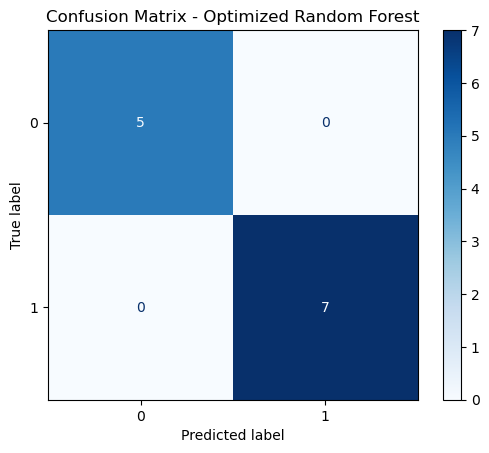

In [213]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Optimized Random Forest")
plt.show()

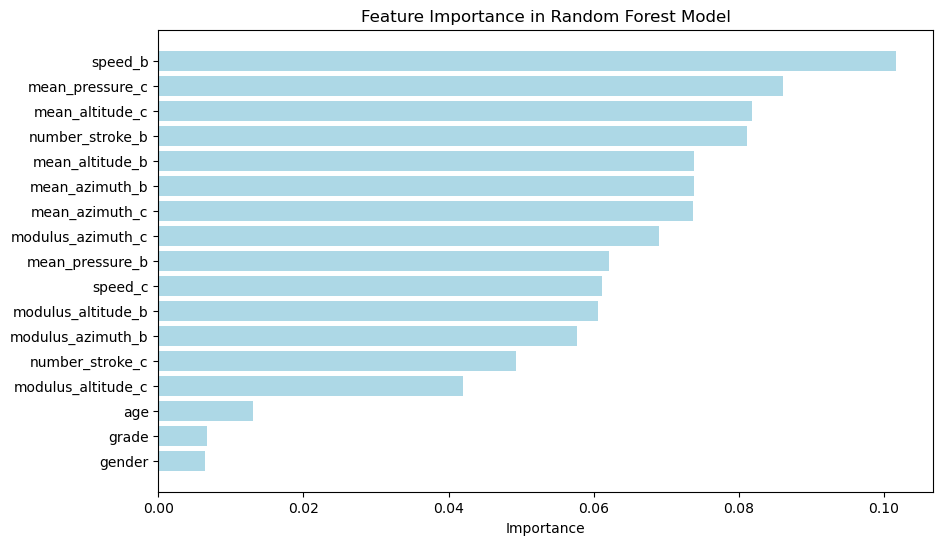

In [214]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
features = X.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

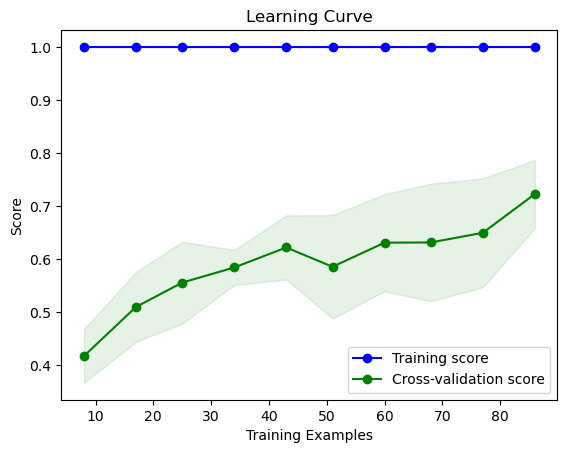

In [215]:
# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training/test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='blue', label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color='green', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


---


## Optimization Using Hyperparameter Tuning with RandomizedSearchCV and StratifiedKFold

In [216]:
# Set up a parameter grid for RandomizedSearchCV
param_grid_rscv = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'max_depth': [10, 20, 30, 50],  # Max depth of the tree
    'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize a RandomForestClassifier
rf_rscv = RandomForestClassifier(random_state=42)

# Create the StratifiedKFold object with 5 folds
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up RandomizedSearchCV with StratifiedKFold cross-validation
random_search = RandomizedSearchCV(estimator=rf_rscv, param_distributions=param_grid_rscv, n_iter=50, 
                                   cv=strat_kfold, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV on the scaled training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Random Forest model with the best parameters
best_rf_model_rscv = random_search.best_estimator_

# Make predictions on the test set
y_pred_rf_rscv = best_rf_model_rscv.predict(X_test_scaled)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}


#### Optimized Random Forest Model Evaluation

In [217]:
# Find the accuracy of the optimized model
accuracy_rf_rscv = accuracy_score(y_test, y_pred_rf_rscv)
print(f"Optimized Random Forest Model Accuracy: {accuracy_rf_rscv}")

Optimized Random Forest Model Accuracy: 1.0


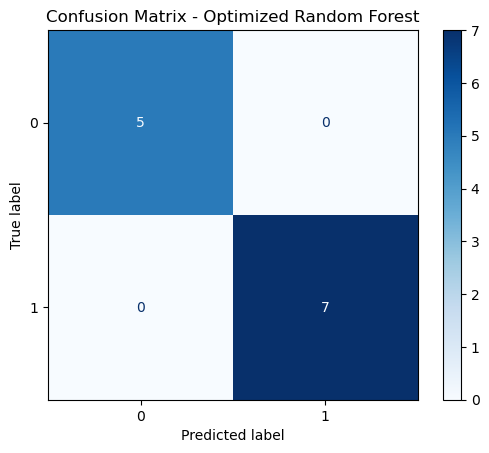

In [218]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_rscv)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Optimized Random Forest")
plt.show()

In [219]:
# Generate the classification report as a dictionary
classification_report_dict_rscv = classification_report(y_test, y_pred_rf_rscv, output_dict=True)

# Convert the dictionary to a Pandas DataFrame
classification_report_df_rscv = pd.DataFrame(classification_report_dict_rscv).transpose()

# Round the numerical values to two decimal places
classification_report_df_rscv= classification_report_df_rscv.round(2)

# Display the Dataframe
display(classification_report_df_rscv)

,precision,recall,f1-score,support
negative,1.0,1.0,1.0,5.0
positive,1.0,1.0,1.0,7.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,12.0
weighted avg,1.0,1.0,1.0,12.0


### Feature Importance

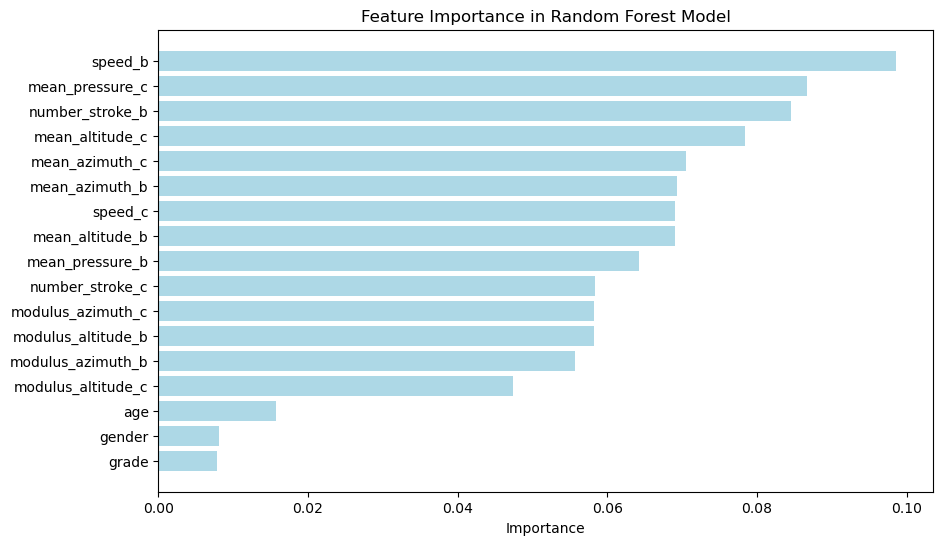

In [220]:
# Get feature importances from the Random Forest model
importances = best_rf_model_rscv.feature_importances_

# Create a DataFrame for feature importance
features = X.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

### Learning Curve

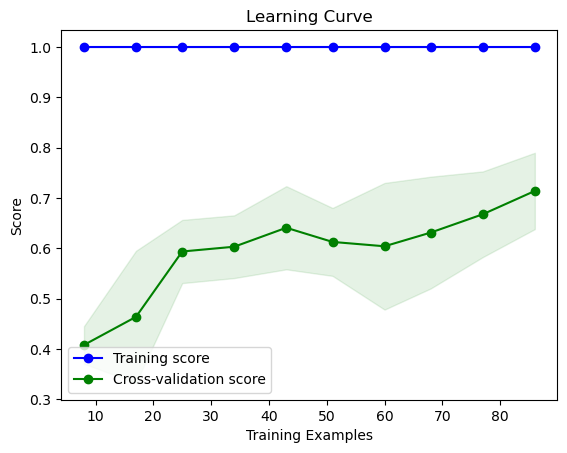

In [221]:
# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model_rscv, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training/test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='blue', label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color='green', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


---

## Further Optimization 
- Generate Synthetic Data
- Using Hyperparameter Tuning with RandomizedSearchCV and StratifiedKFold
- GridSearch CV for fine tuning

In [222]:
# File paths
file_path_augmented = r'Resources/Augmented_Handwriting_Data.csv'

# Load the csv data
df_augmented = pd.read_csv(file_path_augmented)
df_augmented

,Student ID,age,gender,grade,speed_c,number_stroke_c,mean_pressure_c,mean_altitude_c,modulus_altitude_c,mean_azimuth_c,modulus_azimuth_c,speed_b,number_stroke_b,mean_pressure_b,mean_altitude_b,modulus_altitude_b,mean_azimuth_b,modulus_azimuth_b,Label Emotion_y,Fine Motor Skill Label
0,10001.000000,7.000000,0.000000,1.000000,165.000000,28.000000,474.000000,1467.000000,1520.000000,579.000000,600.000000,87.000000,28.000000,474.000000,1467.000000,1520.000000,579.000000,600.000000,positive,NaN
1,10003.000000,6.000000,0.000000,1.000000,155.000000,44.000000,302.000000,1160.000000,1220.000000,468.000000,460.000000,116.000000,50.000000,318.000000,1235.000000,1240.000000,501.000000,480.000000,negative,NaN
2,10004.000000,6.000000,0.000000,1.000000,128.000000,89.000000,240.000000,1102.000000,1080.000000,559.000000,550.000000,100.000000,55.000000,295.000000,1073.000000,1070.000000,565.000000,550.000000,positive,NaN
3,10005.000000,6.000000,0.000000,1.000000,168.000000,40.000000,362.000000,1133.000000,1170.000000,545.000000,530.000000,247.000000,44.000000,441.000000,1059.000000,1010.000000,519.000000,520.000000,negative,NaN
4,10006.000000,6.000000,0.000000,1.000000,124.000000,81.000000,274.000000,850.000000,900.000000,741.000000,780.000000,76.000000,62.000000,318.000000,857.000000,900.000000,692.000000,710.000000,positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,10656.518727,6.908881,0.958569,1.030848,63.588034,53.608604,358.253917,1194.163517,923.437583,821.048692,824.037700,108.726473,60.097315,350.080731,1539.215496,1302.736094,849.065847,869.745774,negative,NaN
476,10623.764149,6.864219,0.000000,0.965941,142.868465,43.732095,545.464106,1094.870207,1102.407102,657.326180,643.624887,122.265717,19.073442,551.482943,1298.344732,1320.878120,559.102299,593.087393,negative,NaN
477,10170.195593,7.942815,0.000000,1.920300,149.401451,97.737075,98.711454,1322.891252,1318.944501,407.775433,433.245157,149.274286,45.359047,155.919961,1333.521151,1314.866783,421.910268,436.057885,negative,NaN
478,9797.420728,7.080379,0.974168,1.942965,123.942384,31.713272,595.576704,1010.977329,1088.034098,596.481711,661.147937,135.669619,22.448005,638.461868,1059.736043,1162.697240,652.720840,678.555986,negative,NaN


In [223]:
# Define features (X) and target (y)
X = df_augmented[['speed_c', 'number_stroke_c', 'mean_pressure_c', 'mean_altitude_c', 
                 'modulus_altitude_c', 'mean_azimuth_c', 'modulus_azimuth_c', 
                 'speed_b', 'number_stroke_b', 'mean_pressure_b', 'mean_altitude_b', 
                 'modulus_altitude_b', 'mean_azimuth_b', 'modulus_azimuth_b']]
y = df_augmented['Label Emotion_y']  # Set the target variable# Define features (X) and target (y)
X = df_augmented[['speed_c', 'number_stroke_c', 'mean_pressure_c', 'mean_altitude_c', 
                 'modulus_altitude_c', 'mean_azimuth_c', 'modulus_azimuth_c', 
                 'speed_b', 'number_stroke_b', 'mean_pressure_b', 'mean_altitude_b', 
                 'modulus_altitude_b', 'mean_azimuth_b', 'modulus_azimuth_b']]
y = df_augmented['Label Emotion_y']  # Set the target variable

In [224]:
# Check the shapes of X and y
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (480, 14)
Target shape: (480,)


In [225]:
# Split the data into training (80%), validation (10%), and testing (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)  # 10% validation

# Check the shapes of the splits
print("Training Features shape:", X_train.shape)
print("Validation Features shape:", X_val.shape)
print("Test Features shape:", X_test.shape)

Training Features shape: (341, 14)
Validation Features shape: (43, 14)
Test Features shape: (96, 14)


In [226]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [227]:
# Initialize Random Forest model
rf_model_augmented = RandomForestClassifier(random_state=42)

# Fit the model using training data
rf_model_augmented.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [228]:
# Set up a parameter grid for RandomizedSearchCV
param_grid_augmented = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [10, 15, 20, 25],  # Max depth of the tree
    'min_samples_split': [10, 15, 20, 25],  # Minimum number of samples required to split a node
    'min_samples_leaf': [4, 6, 8, 10],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize a RandomForestClassifier
rf_augmented = RandomForestClassifier(random_state=42)

# Create the StratifiedKFold object with 5 folds
strat_kfold_augmented = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up RandomizedSearchCV with StratifiedKFold cross-validation
random_search_augmented = RandomizedSearchCV(estimator=rf_augmented, param_distributions=param_grid_augmented, n_iter=50, 
                                   cv=strat_kfold_augmented, verbose=2, random_state=42, n_jobs=-1, error_score='raise')

# Fit the RandomizedSearchCV on the scaled training data
random_search_augmented.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_augmented = random_search_augmented.best_params_
print(f"Best Parameters: {best_params_augmented}")

# Train the Random Forest model with the best parameters
best_rf_model_augmented = random_search_augmented.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [229]:
# Evaluate on the test set
y_pred_rf_augmented = best_rf_model_augmented.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_rf_augmented)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.0


In [230]:
# Refine the parameter grid based on the best parameters from RandomizedSearchCV
param_grid_fine_tune = {
    'n_estimators': [80, 100, 120],  # Narrowing around 100
    'max_depth': [18, 20, 22],  # Narrowing around 20
    'min_samples_split': [8, 10, 12],  # Narrowing around 10
    'min_samples_leaf': [3, 4, 5],  # Narrowing around 4
    'max_features': ['log2'],  # Fixed to 'log2' as found in RandomizedSearchCV
    'bootstrap': [False]  # Fixed as found in RandomizedSearchCV
}

# Initialize the RandomForestClassifier
rf_augmented_fine = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with StratifiedKFold cross-validation
grid_search_fine_tune = GridSearchCV(estimator=rf_augmented_fine, 
                                     param_grid=param_grid_fine_tune, 
                                     cv=strat_kfold_augmented, 
                                     verbose=2, 
                                     n_jobs=-1)

# Fit the GridSearchCV on the scaled training data
grid_search_fine_tune.fit(X_train_scaled, y_train)

# Get the best parameters from GridSearchCV
best_params_fine_tune = grid_search_fine_tune.best_params_
print(f"Best Parameters from GridSearchCV: {best_params_fine_tune}")

# Train the Random Forest model with the best parameters from GridSearchCV
best_rf_model_fine_tune = grid_search_fine_tune.best_estimator_

# Make predictions on the test set
y_pred_rf_fine_tune = best_rf_model_fine_tune.predict(X_test_scaled)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters from GridSearchCV: {'bootstrap': False, 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 80}


## Fine Tuned Model Evaluation
1. Generate Confusion Matrix
2. Evaluate on the test set
3. Evaluate the model on the validation set 
4. Evaluate the cross-validation score.
5. Generate ROC Graph 
6. Generate Learning Curve

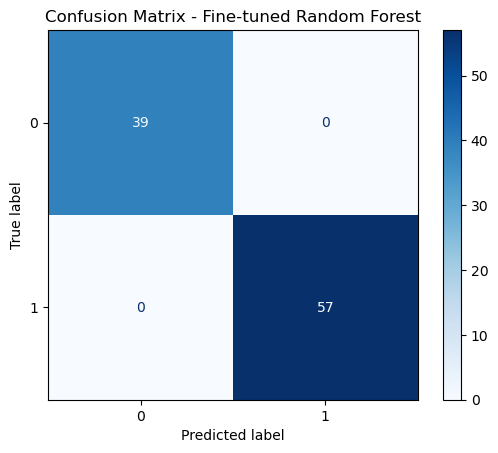

In [231]:
# Generate a confusion matrix for the fine-tuned model
conf_matrix_fine_tune = confusion_matrix(y_test, y_pred_rf_fine_tune)
disp_fine_tune = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_fine_tune)
disp_fine_tune.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Fine-tuned Random Forest")
plt.show()

In [232]:
# Find the accuracy of the fine-tuned model
accuracy_rf_fine_tune = accuracy_score(y_test, y_pred_rf_fine_tune)
print(f"Fine-tuned Random Forest Model Accuracy: {accuracy_rf_fine_tune}")


Fine-tuned Random Forest Model Accuracy: 1.0


In [233]:
# Evaluate the model on the validation set
y_pred_rf_fine_tune = best_rf_model_fine_tune.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_pred_rf_fine_tune)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 1.0


In [234]:
scores = cross_val_score(best_rf_model_fine_tune, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [1.         0.97058824 1.         0.94117647 0.91176471 1.
 1.         0.97058824 0.97058824 1.        ]
Mean accuracy: 0.9764705882352942


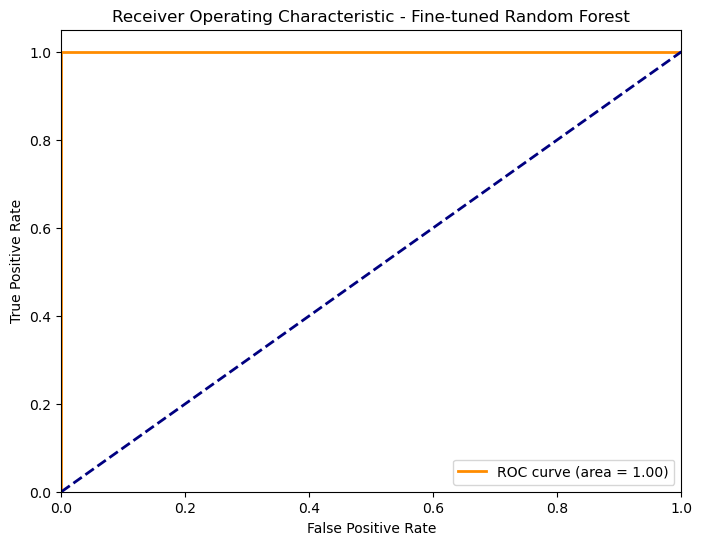

AUC Score: 1.00


In [235]:
# Encode 'positive' and 'negative' to 1 and 0
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Now 'positive' -> 1 and 'negative' -> 0

# Get the predicted probabilities for the test set (for positive class)
y_proba_rf_fine_tune = best_rf_model_fine_tune.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for the fine-tuned Random Forest model
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_proba_rf_fine_tune, pos_label=1)  # pos_label=1 for 'positive'
roc_auc = roc_auc_score(y_test_encoded, y_proba_rf_fine_tune)  # Compute AUC score

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plot the diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Fine-tuned Random Forest')
plt.legend(loc="lower right")
plt.show()

# Print the AUC Score
print(f"AUC Score: {roc_auc:.2f}")

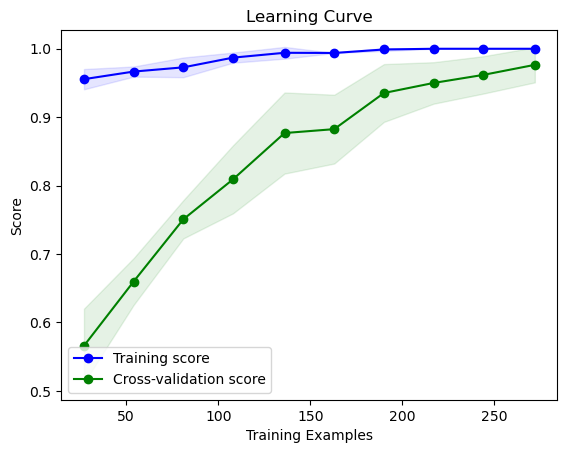

In [236]:
# Compute learning curve for the fine-tuned model
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model_fine_tune, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training/test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='blue', label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color='green', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [237]:
# Save the fine-tuned model
with open('fine_tuned_rf_model.joblib', 'wb') as model_file:
    joblib.dump(best_rf_model_fine_tune, model_file)

print("Fine-tuned Random Forest model saved as 'fine_tuned_rf_model.joblib'")

Fine-tuned Random Forest model saved as 'fine_tuned_rf_model.joblib'
